In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

sns.set_theme()

df = sns.load_dataset('tips')

### 0

### a)

In [3]:
# NOTE: we're only interested in the columns that have numerical data, as the type of regression we're using
# is only suited for that.
display(df), df.info(), df.describe()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


(None,
 None,
        total_bill         tip        size
 count  244.000000  244.000000  244.000000
 mean    19.785943    2.998279    2.569672
 std      8.902412    1.383638    0.951100
 min      3.070000    1.000000    1.000000
 25%     13.347500    2.000000    2.000000
 50%     17.795000    2.900000    2.000000
 75%     24.127500    3.562500    3.000000
 max     50.810000   10.000000    6.000000)

### b)

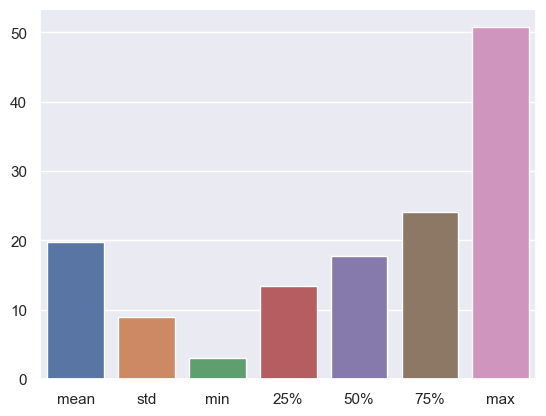

In [4]:
test = df['total_bill'].describe()

# Not interested in "count"
test = test.drop('count')

# .values removes the "total_bill" text from the y axis
sns.barplot(x=test.index, y=test.values);

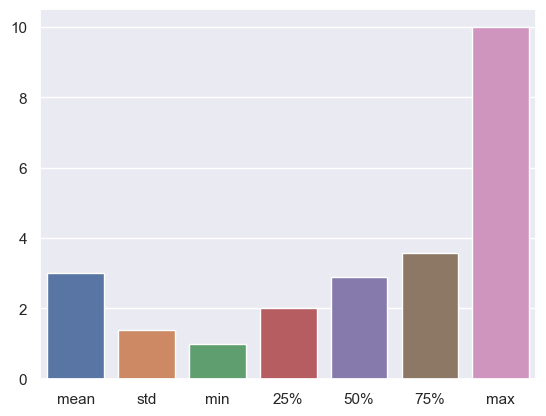

In [5]:
test = df['tip'].describe()

# Not interested in "count"
test = test.drop('count')

# .values removes the "total_bill" text from the y axis
sns.barplot(x=test.index, y=test.values);

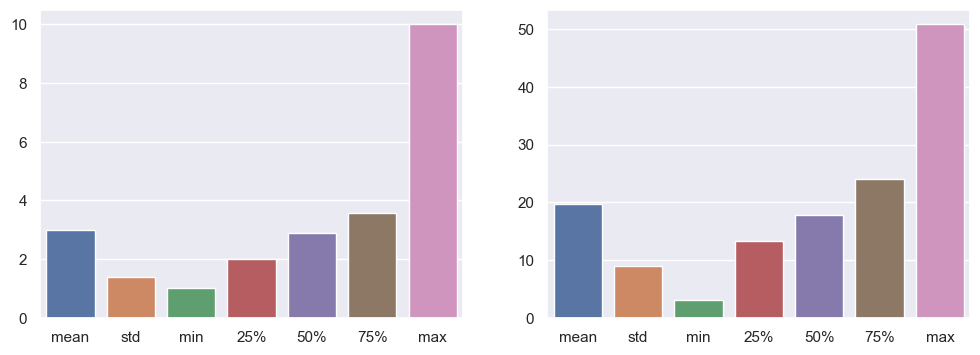

In [63]:
metrics = ['tip', 'total_bill']
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i, metric in enumerate(metrics):
    test = df[metric].describe()
    
    # Not interested in "count"
    test = test.drop('count')
    
    sns.barplot(x=test.index, y=test.values, ax=ax[i])


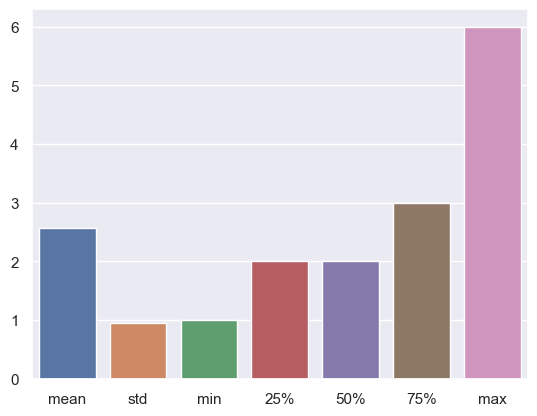

In [7]:
test = df['size'].describe().drop('count')
sns.barplot(x=test.index, y=test.values);

### c) - FIX

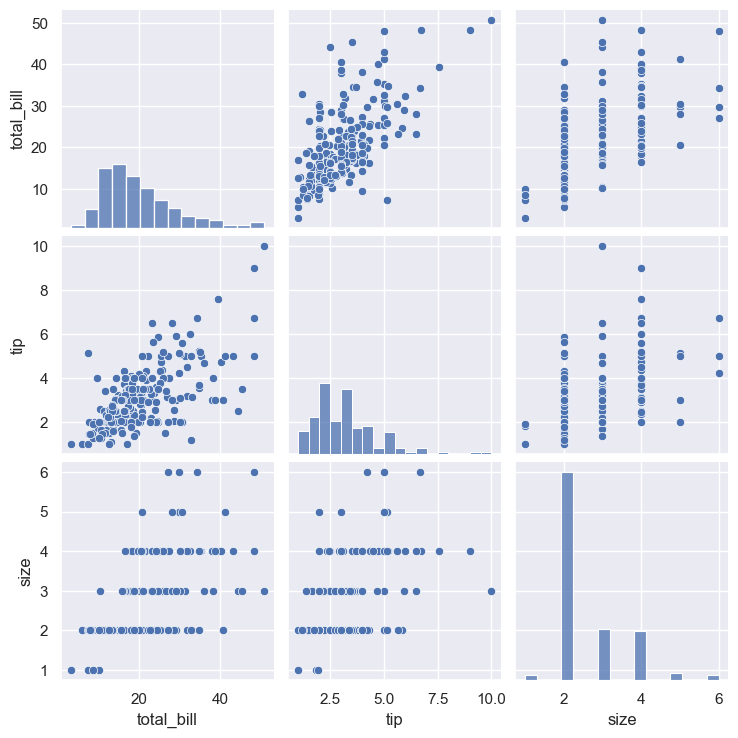

In [8]:
sns.pairplot(df)

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

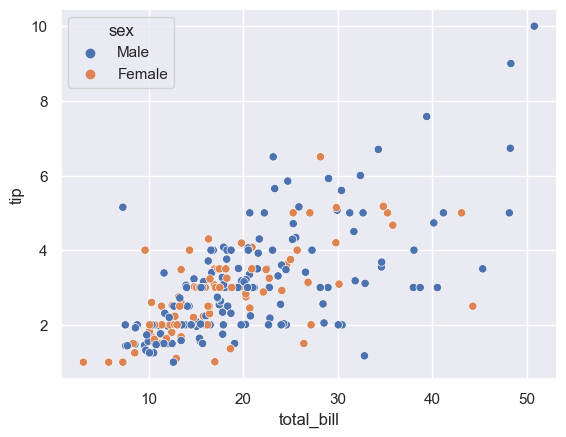

In [9]:
sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex")

<AxesSubplot: xlabel='sex', ylabel='tip'>

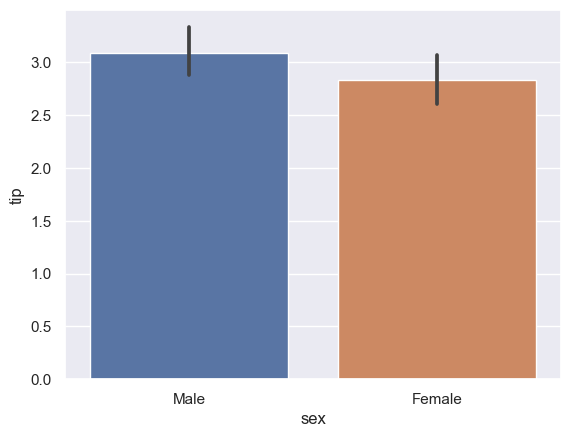

In [10]:
sns.barplot(data=df, x="sex", y="tip")

<AxesSubplot: xlabel='time', ylabel='total_bill'>

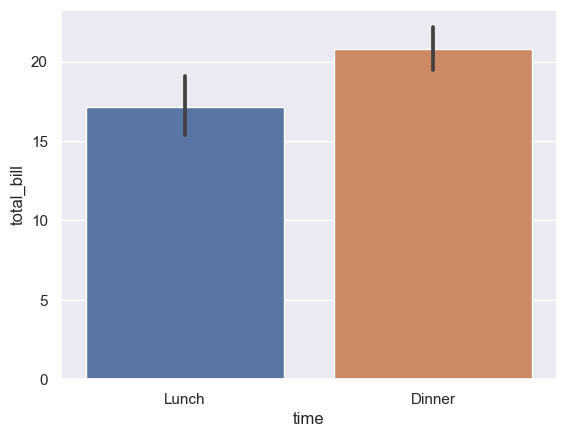

In [11]:
sns.barplot(data=df, x="time", y="total_bill")

### 1

In [12]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1

In [13]:
x = df[['tip', 'size']]
y = df['total_bill']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((170, 2), (74, 2), (170,), (74,))

### 2)

In [14]:
x_train_combined = x_train.unstack().reset_index(drop=True) #TODO: understand

x_train_combined.mean(), x_train_combined.std()

(2.835647058823529, 1.2529843520848514)

In [15]:
scaled_x_train = (x_train - x_train_combined.mean()) / x_train_combined.std()
scaled_x_test = (x_test - x_train_combined.mean()) / x_train_combined.std()

scaled_x_train

,tip,size
234,0.131169,-0.666925
227,0.131169,0.929264
180,0.673873,0.929264
5,1.495911,0.929264
56,0.131169,0.929264
...,...,...
106,0.977149,-0.666925
14,0.147131,-0.666925
92,-1.465020,-0.666925
179,0.570121,-0.666925


### 3)

In [16]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly_features = poly_features.fit_transform(scaled_x_train)

x_train_poly_features[:5]

array([[ 0.13116919, -0.66692537,  0.01720536, -0.08748006,  0.44478946],
       [ 0.13116919,  0.92926375,  0.01720536,  0.12189077,  0.86353112],
       [ 0.67387349,  0.92926375,  0.45410548,  0.62620621,  0.86353112],
       [ 1.49591089,  0.92926375,  2.2377494 ,  1.39009577,  0.86353112],
       [ 0.13116919,  0.92926375,  0.01720536,  0.12189077,  0.86353112]])

In [17]:
x_test_poly_features = poly_features.transform(scaled_x_test)
x_test_poly_features[:5]

array([[ 0.27482621, -0.66692537,  0.07552945, -0.18328857,  0.44478946],
       [-0.66692537, -0.66692537,  0.44478946,  0.44478946,  0.44478946],
       [-0.66692537,  0.92926375,  0.44478946, -0.61974958,  0.86353112],
       [ 1.85505345,  0.92926375,  3.44122329,  1.72383393,  0.86353112],
       [-0.66692537, -0.66692537,  0.44478946,  0.44478946,  0.44478946]])

In [18]:
data_leak_test1 = poly_features.transform(x_test)

data_leak_test2 = poly_features.fit_transform(x_test)

# No data leakage in this case. But best practice is still to use fit_transform on training data,
# and transform on testing (e.g using the calculated (fitted) parameters of the training data to
# transform the testing one.)
data_leak_test1 = data_leak_test2

### 4)

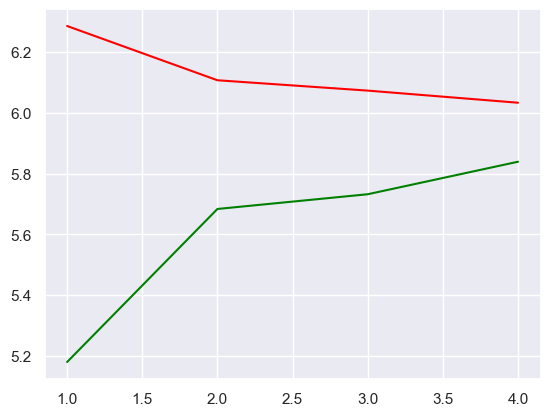

In [19]:
RMSE_test = []
RMSE_train = []

linear_model = LinearRegression()

for deg in range(1, 5):
    poly_features = PolynomialFeatures(degree=deg, include_bias=False) # Could technically be outside of loop.
    x_train_poly_features = poly_features.fit_transform(scaled_x_train)
    x_test_poly_features = poly_features.transform(scaled_x_test)

    linear_model.fit(x_train_poly_features, y_train)
    y_pred = linear_model.predict(x_test_poly_features)
    RMSE_test.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    y_pred = linear_model.predict(x_train_poly_features)
    RMSE_train.append(np.sqrt(mean_squared_error(y_train, y_pred)))


# Fix
plt.plot(range(1, 5), RMSE_test, color="green")

plt.plot(range(1, 5), RMSE_train, color="red")

### 5

In [20]:
poly_features = PolynomialFeatures(degree=4, include_bias=False) # Could technically be outside of loop.
x_train_poly_features = poly_features.fit_transform(scaled_x_train)
x_test_poly_features = poly_features.transform(x_test)

In [21]:
ridgeCV = RidgeCV(alphas=[.01, .1, .5, 1, 5, 10, 100], scoring = "neg_mean_squared_error")
ridgeCV.fit(x_train_poly_features, y_train)
y_pred = ridgeCV.predict(x_test_poly_features)

ridgeCV.alpha_, ridgeCV.coef_


MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False) # Same thing as taking the square root

ridgeCV.alpha_, ridgeCV.coef_, MAE, MSE, RMSE

(100.0,
 array([ 1.45239632,  1.55425055, -0.02134698, -0.33226223, -0.03352046,
         0.57372781,  0.77855569,  0.45706938,  0.81153801, -0.07856085,
        -0.16291278, -0.01577724, -0.50455892, -0.1245028 ]),
 32.84904784933886,
 5385.69100532935,
 73.38726732430736)

In [22]:
model_lassoCV = LassoCV(n_alphas = 200, cv = 5) 
model_lassoCV.fit(x_train_poly_features, y_train)

# penalty found through 5-fold cross-validation
model_lassoCV.alpha_, model_lassoCV.coef_

(0.4314412403588053,
 array([ 3.20797359,  3.67968392, -0.        , -0.        , -0.        ,
         0.05727539,  0.        ,  0.        ,  0.        , -0.        ,
         0.0321051 ,  0.        , -0.22576075, -0.        ]))

In [23]:
y_pred = model_lassoCV.predict(x_test_poly_features)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)

MAE, MSE, RMSE

(21.939284666945746, 1169.0025079596517, 34.19067867065016)

In [24]:
model_elastic = ElasticNetCV(l1_ratio=[0.01, .1, .5, .7, .8, .9, .95, 1])
model_elastic.fit(x_train_poly_features, y_train)

model_elastic.l1_ratio_, model_elastic.alpha_

(1.0, 0.43189530744009863)